# Machine Learning Engineer Nanodegree - Capstone Project

## I. Definition
### Project Overview
As one gets older, an increasingly difficult awareness of our parent's mortality becomes a serious concern. Personally, my parents are both in their early 70's and according to a study[^1] done in __2015__ by the __American Heart Association__, around __370,000__ people die of heart attacks each year and is the __No. 1__ cause of in the United States. In __2014__, around __356,500__ people experienced heart attacks out of the hospital. Of that  amount  only __12%__ survived due to emergency medical services intervention. Personally, I would not like my parents to be one the __88%__ who suffered from a fatal heart attack and didn't survive  due to the fact that there was no intervention by emergency medical services. According to the study, there is a prevalence of almost a *third* of the population at risk of *Heart Disease* leading to a *Heart Attack* as one approaches __80+__ years of age. Having no personal experience in the Coronary Field of Medical research, it would be difficult for me to diagnose any potential warning signs, but with the advent of wearable technology, the mechanisms are in place to potentially aid in this early warning and detection of heart attacks. The majority of wearable technology today has the built-in ability to monitor heart rates. Therefore in this project, I proposed that this input data can be uploaded or sent to a __data ingestion pipeline__ that this capable of interpreting, analyzing and detecting an the patterns that could be classified as symptoms of a heart attack. 

Additionally, since one of the potential symptoms is the increase in heart rates. There are a number of potential factors that influence the increase in heart rate, but there are well published guidelines[^2] that can be used to determine anomalous patterns. If these anomalies occur, the the __data ingestion pipeline__ could proactively determine if a heart attack is about to *or* has occurred and alert the appropriate emergency medical response. Thus proactively preventing a fatal or near-fatal heart attack. As an added benefit, the __pipeline__ mechanism can be used to monitor patients who are in *Cardiac Rehabilitation*[^3].

### Problem Statement
For this Project, I propose creating a classification pipeline that ingests heart-rate signal data (from a simulated wearable monitor) and classifies whether the subject is in a stressful situation that could lead to *Cardiac Unrest*. Additionally, in order to prevent a "cry-wolf" scenario or *false-positives*, the pipeline employs a consensus mechanism where three classifiers must all agree on the classification.

![Figure 1: Training/Testing Pipeline](images/Pipeline.png)

To address the scope of this project however, I propose training three separate supervised machine learning models by applying the following methodology to create the pipeline. Once created, the pipeline (see Figure 1.) will be used to test and deploy the models on a sample unseen data from the test subjects and hence predict their stress levels by following these steps:

1. Collect already filtered PPG [^4] signal data with symbolic peaks (and other features) have been collected for a one-minute time segment. Each one-minute time segment is considered an observation labeled with the class `relax` or `stress`. Additionally, separate the input data into two separate data sets. One for the observations and one for the labeled output.
2. Apply __Feature Extraction__ and if needed, __normalization__ and/or __standardization__ techniques to  preprocess the data.
3. Define three separate models to evaluate the the data.
    - Random Forest
    - Support Vector Machine (SVM)
    - Gaussian Naive Bayes
4. Apply the models and measure their performance on a completely __separate__ and as yet __unseen__ dataset. This dataset is exactly the same as the training dataset except it is has no `State` label.

Once created, the pipeline will be used to test and deploy the models on a sample unseen data from the new test subjects and hence predict their stress levels.

### Metrics
Since the success criteria of the project is based on the overall probability of the observation belonging to either class (`stressed` or `relaxed`), each individual model as well as the overall weighted consensus model will be evaluated using the following metrics:

1. __Accuracy:__ $\rightarrow$ The proportion of the total number of predictions that are "correct".
2. __Recall:__ $\rightarrow$ The measure of completeness of the classifier. In other words, if the label is `stressed`, how well does the model predict that the subject is `stressed`. Basically, the ratio of the number of observations the model can correctly recall, to the number of all correct observations.
$$
Recall = \frac{True Positive}{True Positive + False Negative}
$$

3. __Precision:__ $\rightarrow$ The number of positive predictions divided by the total positive class values. So, precision is the ratio of a number of observations the model can correctly predict to a number of all observations the model can recall. In other words, it is how precise the model's recall is.
$$
Precision = \frac{True Positive}{True Positive + False Positive}
$$

4. __F1 Score:__ $\rightarrow$ If the models are good at *Recall*, that doesn't necessarily mean that they are good at *Precision*. The *F1 Score* is the balanced average of the the two. This balanced *F1 Score* is necessary as an overall performance metric due to the fact that if there is a misclassification that the subject is under stress, but isn't, then the emergency medical services are called out unnecessarily. If however, there is a misclassification that the subject isn't stressed, but actually is, then this could result in a fatality. Having the *F1 Score* will allow us to allocate more weight to *Precision* or *Recall*.
$$
F1 \ Score = \frac{2 \cdot Precision}{Precision + Recall}
$$

---

## II. Analysis
### Data Exploration and Visualization
The dataset used for this Project was obtained as part of a *Proof of Concept (POC)* project in the __Dell IoT Solutions Lab__ [^6] in Santa Clara, California, where a PPG [^4] Pulse sensor was used to measure Heart Rate Variability (HRV) [^7]  reading, similar to those found on current wearables like the __Fitbit Charge 2__ [^8]. The scope of the original POC is simply to verify if the data can be extracted and filtered to detect peaks in the PPG signal for a one minute data segment. Four separate test subjects (between the ages of 68 and 76) were subjected to different stimuli to induce *stress* and *relaxing* scenarios. The one minute observations (__300__ in total) are stored in a `data.csv` file. Each observation has __8__ specific features of the PPG waveform, namely:

1. __Time__ $\rightarrow$ Time Stamp of the observation.
2. __AVRR__ $\rightarrow$ Average "normal" hert beats.
3. __AVHR__ $\rightarrow$ Average total heart beats.
4. __SDRR__ $\rightarrow$ Standard Deviation of "normal" heart beats.
5. __RMSRR__ $\rightarrow$ Root Mean Squared of "normal" hear beats.
6. __ppNN50__ $\rightarrow$ Proportion of NN50 (50 successive "normal" heart beats) divided by total number of "normal" heart beats.
7. __ppNN20__ $\rightarrow$ Proportion of NN20 (20 successive "normal" heart beats) divided by total number of "normal" heart beats.
8. __State__ $\rightarrow$ "Stressed" or "Relaxed".

Table 1 shows a sample of the data.

In [1]:
# Set up Environmental variables
%matplotlib inline

# Remove ALL warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas.tools.plotting import scatter_matrix
warnings.filterwarnings("ignore", category = FutureWarning)

# Load the data
df = pd.read_csv("data/data.csv", header = None)

# Apply column names
names = ["Time", "AVHR", "AVRR", "SDRR", "RMSSD", "ppNN50", "ppNN20", "State"]
df.columns = names

# Display first 5 rows
df.head()

Time       AVHR       AVRR      SDRR     RMSSD     ppNN50  \
0  07:16:37 25-08-15  74.393829  25.203703  1.883951  1.710125  16.666666   
1  07:17:32 25-08-15  74.949188  25.016949  1.408307  1.266273  10.169492   
2  07:18:25 25-08-15  75.541191  24.820896  1.131969  1.154701   5.970149   
3  07:19:19 25-08-15  79.637726  23.544117  1.772854  0.954174   7.352941   
4  07:20:13 25-08-15  72.999283  25.685184  2.366614  1.504710   9.259259   

      ppNN20  State  
0  22.222221  relax  
1  25.423729  relax  
2  26.865671  relax  
3  20.588236  relax  
4  29.629629  relax

Since the features, shown in Table 1 are themselves, descriptive statistics of the original PPG waveform, describing them individually does not provide significant value. Therefore analyzing the relationship between them might provide better insight.

For instance, from the scatter plot matrix (Plot 1), it can be seen that there is a linear correlation between __RMSSD__ and __SDRR__ as well as __RMSSD__ and __ppNN50__. However, the distribution of these features is __not__ evenly spread and skewed to the __right__, with a significant number of outliers (especially the __RMSSD__ variable). These factors could lead to high *bias* and low *variance* in the model. However there is a good spread and somewhat even distribution with __AVHR__, __AVRR__ and __ppNN20__ that may alleviate these issues.

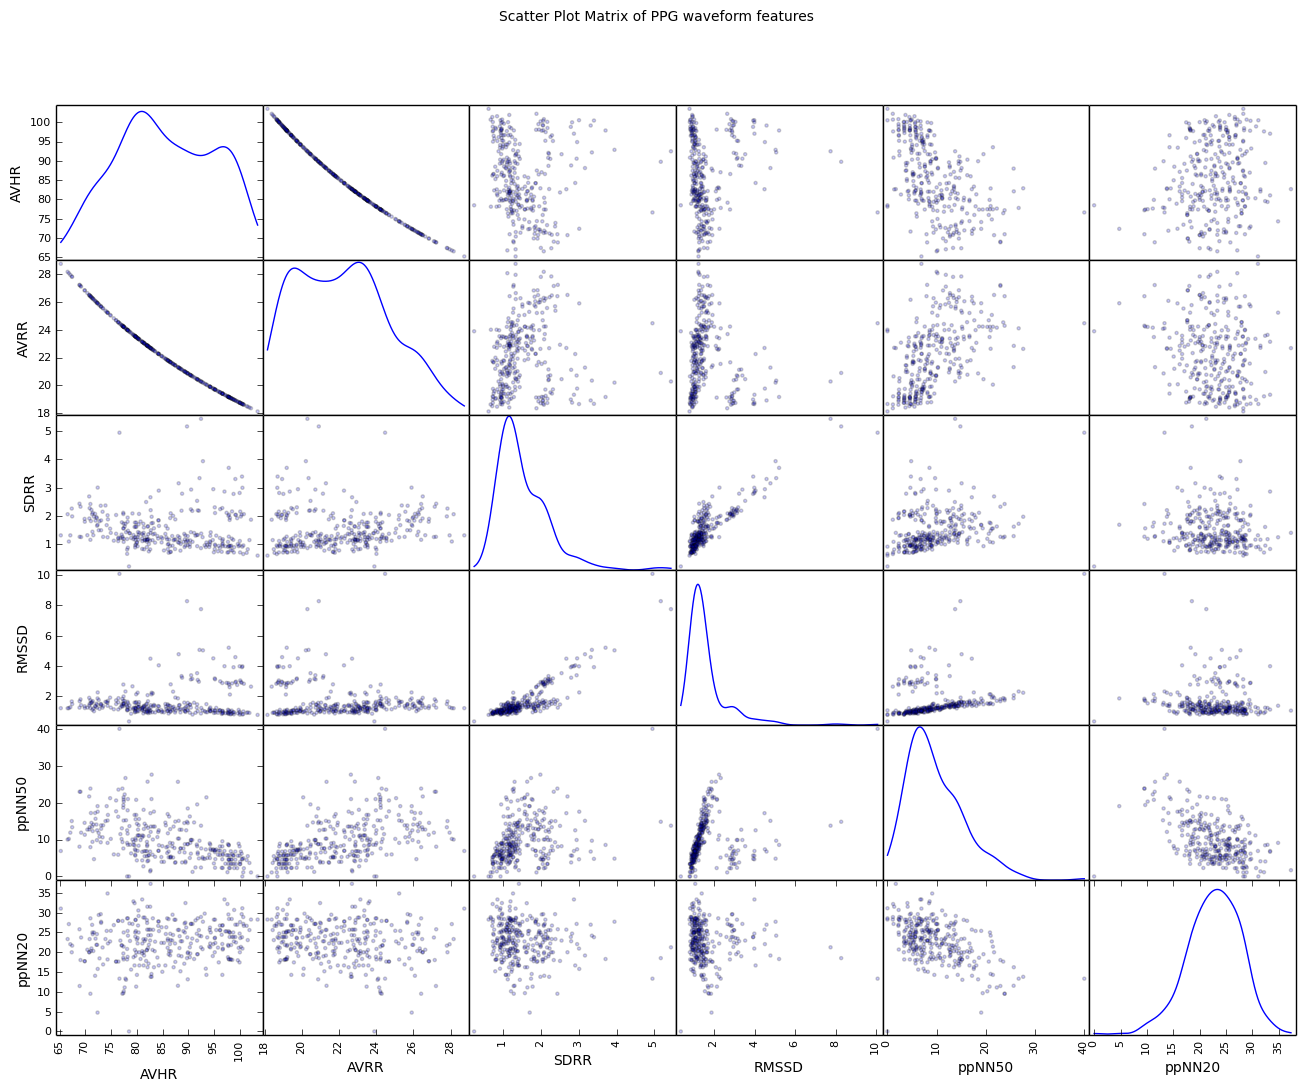

In [2]:
# Scatterplot Matrix
scatter_matrix(df, alpha=0.2, figsize=(16, 12), diagonal='kde')
plt.suptitle("Scatter Plot Matrix of PPG waveform features")
plt.show();

There are three concerns with the input dataset however. The *first* is that fact that it has only __300__ observations, thus making it a relatively small data set. Based on this, the *second* is that we may not have an equal spread of labels. The *third* is the variables like __SDRR__ and __RMSSD__ show some extreme outliers and have different scales. 


stress    157
relax     143
Name: State, dtype: int64


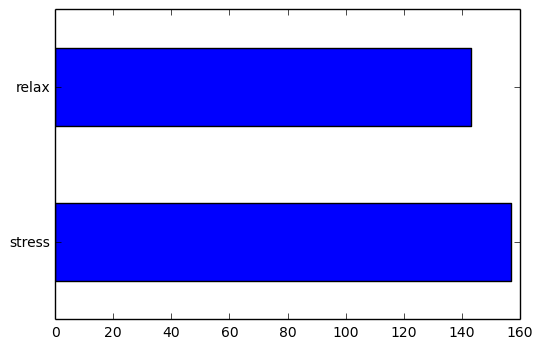

In [3]:
# Plot label counts
df.State.value_counts().plot(kind = 'barh');

# Display the label counts
print df.State.value_counts()

As can be seen from Plot 2, there is a somewhat equal spread of labels for `stress` (__157__) and `realax` (__143__).

### Algorithms and Techniques
The overarching problem that needs to be solved, is one of __classification__. In essence, when PPG waveform data is received and based on this input, can we predict that the subject is stressed or relaxed. There are a number of algorithms that provide this sort of classification, but  for this project only three base classifieds have been selected. This is due to the fact that the end classification is time-sensitive. In other words, there is a trade-off between having the most optimal classification algorithm to determine the subjects state, but by the time the algorithm has  determined the subjects state, it may be too late to effectively do anything with the classification data.

Additionally, since the chosen model is based on weighted probabilistic inference, the thee base classifiers that have been selected to be part of the ensemble must have easily fit into the goal. To this end, the following three algorithms have been selected:

1. __Gaussian Naive Bayes__ $\rightarrow$ This algorithm is probabilistic in nature and even though it considers each of the features as independent contributors (ignoring some of the correlations already alluded to), it fits within the paradigm of the *Weighted Majority Rule* ensemble model. Additionally, this algorithm is an easy technique to implement and is robust in it's inference on many types of data.
2. __Support Vector Machine__ $\rightarrow$ *SVM* has been selected due to it's ability to find the best separator for the data, ensuring a clean determination of what a data point's classification is.
3. __Random Forest__ $\rightarrow$ The *Random Forest* algorithm has been selected because it does not have any of the characteristics that make it a fit for the final model. It  is being used to hopefully balance out the ensemble and prevent any overfitting that the other models may cause. 

The final classification is implemented using a __Weighted Majority Rule Ensemble Classifier__[^5], based on the probability of the time segment observation belonging to either class and using the following:

$$
\hat{y} = \arg\max_{i}\sum^{m}_{j=1}w_{j}p_{ij},
$$

where $wj$ is the weight that can be assigned to the $j^{th}$ classifier.

Various techniques will be leveraged that address the three concerns highlighted in the **Data Exploration** section. To address the first two concerns, I propose leveraging the __k-fold cross validation__ technique, where the process of training the algorithm is executed __10__ times (10 Folds) where each fold is considered a unique set of training data. The advantage of this technique is that it can treat each test set uniquely, thus addressing the fact that the data set used is relatively small, and provide an average prediction result across the 10 folds. This process will be used for each of the three models discussed later. To ensure that there is not an __imbalance__ of labels, we can verify the count of each label (as shown below).__However__, the third concern will not be addressed since the data are themselves statistical measurements of the original waveform. Scaling and normalizing the data to address outliers and scale may have a negative impact on the models capability to accurately predict the labels as it may overfit the data.

### Benchmark
Since there isn't another comparable methodology for the proposed pipeline and hence there isn't a comparable model implementation to serve as a benchmark, the pipeline methodology will be compared to a simple __Logistic Regression__. The evaluation criteria will be leveraged to compare each individual model's performance as well as the final ensemble model's performance against the *Logistic Regression* baseline model.

In [4]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Import the data
df = pd.read_csv("data/data.csv", header = None)

# Apply column names
names = ["Time", "AVHR", "AVRR", "SDRR", "RMSSD", "ppNN50", "ppNN20", "State"]
df.columns = names
df = df.drop("Time", 1)

# Convert the gatagorical column `State` into binary numbers
le = preprocessing.LabelEncoder()
df.State = le.fit_transform(df.State)

# Create variables and labels
X = df.drop(['State'], 1)
y = df['State']

# Create final results
results = pd.DataFrame({"Metric:": ["Accuracy", "Recall", "Precision", "F1 Score"]})

# Create the Logistic Regression model
model = LogisticRegression()

# Fit the Model
model = model.fit(X, y)

For the *Logistic Regression* baseline, the data is separated into __10__ *Folds* of *Testing* and *Training* data to avoid over fitting and average out the final evaluation metrics across multiple trials since the data set are small. Additionally, since the `Time` variable has no impact on the model, it was removed. 

The only preprocessing step involves performing __Feature Extraction__. For more details, see the __Data Preprocessing__ section. The baseline scores are as follows:

In [5]:
accuracy = cross_val_score(model, X, y, cv = 10, scoring = "accuracy")
precision = cross_val_score(model, X, y, cv = 10, scoring ="precision")
recall = cross_val_score(model, X, y, cv = 10, scoring = "recall")
f1 = cross_val_score(model, X, y, cv = 10, scoring = "f1")

tmp_df = pd.DataFrame({"benchmark": [np.mean(accuracy),\
                                     np.mean(precision),\
                                     np.mean(recall),\
                                     np.mean(f1)]})
print "Accuracy: {}".format(np.mean(accuracy))
print "Recall: {}".format(np.mean(recall))
print "Precision: {}".format(np.mean(precision))
print "F1 Score: {}".format(np.mean(f1))
results = results.join(tmp_df)

Accuracy: 0.781535038932
Recall: 0.791666666667
Precision: 0.775215817321
F1 Score: 0.754255684256


<!--- Original code with 20 Fold cross validation
accuracy = cross_val_score(model, X, y, cv = 20, scoring = "accuracy")
precision = cross_val_score(model, X, y, cv = 20, scoring ="precision")
recall = cross_val_score(model, X, y, cv = 20, scoring = "recall")
f1 = cross_val_score(model, X, y, cv = 20, scoring = "f1")

print "Accuracy: {}".format(np.mean(accuracy))
print "Recall: {}".format(np.mean(recall))
print "Precision: {}".format(np.mean(precision))
print "F1 Score: {}".format(np.mean(f1))
--->

<!--- Original code with NO cross validation
# Check the accuracy on the entire data set
model.score(X, y)
--->

The initial benchmark evaluation metric for the *Logistic Regression* model is an __Accuracy__ of __78.1%__. This is a fairly decent score considering no optimization or ensemble learning has been performed. Thus the *objective* of **Section III** below is to improve on this metric.

---

## III. Methodology
### Data Preprocessing
The *first* step in preprocessing the data for model fitting, is to perform __Feature Extraction__. *Feature Extraction* separates the incoming signal data from the heart rate monitor into two separate data sets. The first data set are the signal observations, while the second data set are the training labels associated with each observation. The *second* step is to further convert the labels into a binary integer value, demarcating: 

- ${0} \rightarrow$ __ `relax`__
- ${1} \rightarrow$ __`stress`__

<!--- Original preprocessing verbage
The *third* step is to __Standardize__ and __Normalize__ the data, using the following formulas:
>**Standardize:**
$$
X = \frac{\sum^{n}_{i=1}(x_{i} - \mu)}{\sigma}
$$

>**Normalize:**
$$
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

Doing this, will "center" the distribution of the data to zero, with a standard deviation of one (creating a normal distribution) and sets scale of each observation to be between $0$ and $1$. By applying these techniques, we eliminate the variability of the data so that that each observation's scale is on par with the other and thus the model is not biased toward stronger variables. 
--->

<!--- Original code for standardization and normalization
# Import preprocessing libaries
from sklearn import preprocessing

# Standardize the data
std_scale = preprocessing.StandardScaler().fit(X)
df_std = std_scale.transform(X)

# Scale the data
minmax_scale = preprocessing.MinMaxScaler().fit(X)
df_minmax = minmax_scale.transform(X)

# Print min and max values for AVHR as an example
print "AVHR Minimum Scaled Value: {}".format(df_minmax[:, 0].min())
print "AVHR Maximum Scaled Value: {}".format(df_minmax[:, 0].max())
--->

<!---
The example above, shows the *minimum* and *maximum* values of the now preprocessed __AVHR__ variable.
--->

<!-- Original Code
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#import numpy as np

np.random.seed(42)

clf1 = RandomForestClassifier()
clf2 = SVC(C = 1.0, gamma = "auto", kernel = "rbf", random_state = 42, verbose = False, probability = True)
clf3 = GaussianNB()

print('20-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3], ["Random Forest", "SVM", "Naive Bayes"]):

    scores = cross_validation.cross_val_score(clf, X, y, cv = 20, scoring = "accuracy")
    print "{} Accuracy: {}".format(label, scores.mean())
--->

### Implementation
Once the data has been preprocessed, the three chosen classification models can be applied:

>**Note:** Henceforth the following three models will be referred to as the *base* models.

#### Random Forest
The __Random Forest__[^9] classifier (an ensemble method itself) is used to cluster points of data into functional groups. When the data set is large and/or there are many variables it becomes difficult to cluster the data because not all variables can be taken into account, therefore the algorithm can also give a certain chance that a data point belongs in a certain group. Based on this, this classifier is selected as one of the methods due to the fact that the data set are relatively small. 

To perform the classification, the algorithm clusters the data into groups and subgroups, or decision trees. At each split of the tree, variables are chosen at random as to whether the data points have a close relationship or not.
The algorithm makes multiple trees to create a "forest", with each tree being different due to the fact that the decision split occurs on different variables. The classification is used to predict which tree in the forests makes the best classification of the label data.

#### Support Vector Machine (SVM)
The __SVM__[^10] is a classifier that tries to draw the *best* line to separate the classifications, in this case `stress` and `relax`. Since there can be multiple decision boundaries to correctly separate the two classes, this model is implemented to find the best separation that maximizes the distance between all the data point in each classification. 

#### Gaussian Naive Bayes
Since the overall objective for the final pipeline and *weighted majority rule* classifier is based on probability of an observation belonging to one one of the two classes, an obvious choice for the third classification method is the __Gaussian Naive Bayes__[^11] classifier as it is a simple probabilistic classifier based on applying *Bayes' theorem* with strong (or naive) independence assumptions between the features. In other words, a *Naive Bayes* classifier considers each feature to contribute independently to the final probability, regardless of any possible correlations between the features.

For the additional optimization techniques used with the three classifiers, see the next section, **Refinement**. To see the resultant evaluation metrics and how they compare with the *baseline* model's results, see **Section IV**.

In [6]:
# Execute the 3 models
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

clf1 = RandomForestClassifier(criterion = "entropy", max_depth = 4, min_samples_split = 4,\
                             min_samples_leaf = 5, max_features = 0.7, random_state = 42)
clf2 = SVC(C = 1.0, gamma = 0.01, kernel = "rbf", random_state = 42, verbose = False, probability = True)
clf3 = GaussianNB()

### Refinement
To refine the the above implementation, a number of model specific hyper parameters have been used to improve the overall performance above that of the default parameters. As a whole, the fact that the dataset is significantly small becomes apparent in that to get a better, more accurate fit, the original idea for a __10-Fold Cross Validation__ has to be increased to __20 Folds__. The following highlights the individual hyper parameters tweaked for each model:

#### Random Forest Classifier
For the *Random Forest* classifier, the following hyper parameters are changed:
- __criterion__ $\rightarrow$ The default setting to measure the quality of a split on a tree is the *Gini* impurity. Since *Gini* is intended for continuous attributes and *Entropy* is intended for attributes that occur in classes as in this case, `entropy` is used for the *criterion* parameter.[^12]
- __max_depth__ $\rightarrow$ The maximum depth of each tree (vertical depth). This setting has been set to `4` as a higher depth will allow the model to learn relations that are specific to a particular data point and hence it could lead to overfitting.
- __min_samples_split__ $\rightarrow$ The minimum amount of observations required in a node before it can be considered for splitting. This setting has been set to `4` as higher values prevent a model from learning relations that are too specific to a particular "tree".
- __min_samples_leaf__ $\rightarrow$ The minimum amount of observations required in a terminal node (leaf node). This setting has been set to `5` which is one value higher then *min_samples_split* as this too controls overfitting.
- __max_features__ $\rightarrow$ The number of features to consider while searching for the best split. This is set to `0.7` (or 70%), to avoid overfitting as the parameter is cross-validated with a 70/30 split.

#### Support Vector Machine (SVM)
For the *SVM* classifier, the following hyper parameter are changed:
- __kernel__ $\rightarrow$ These are functions that transform low dimensional input space into higher dimensional space. In other words, convert non-separable problems into separable ones. This setting has been set to a `rbf` (Radial basis function) kernel since the data is not linearly separable.
- __gamma__ $\rightarrow$ This parameter defines how "far" the influence for a single training example reaches, with low values meaning "far" and high values meaning "close". This parameter is required when using a `rbf` kernel and in this setting, the value is set to `0.01` so that the radius of the area of influence of the support vectors only includes the support vector itself.
- __C__ $\rightarrow$ This parameter is also required when using the `rbf` kernel and is used as a trade-off for misclassification. This setting has been set to `1.0` which is relativley low due so as to reduce the complexity of the model and avoid overfitting. 
- __probability__ $\rightarrow$ This setting is set to `True` so that the score can be leveraged in the final *Majority Rule Ensemble* classifier, which is based on weighted probability.

#### Gaussian Naive Bayes
No hyper parameters have been applied to the *Gaussian Naive Bayes* classifier, as the `GaussianNB()` function from `sklearn` doesn't require any.

In [7]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin as Classifiers
import operator

class EnsembleClassifier(BaseEstimator, Classifiers):
    
    def __init__(self, clfs, weights=None):
        self.clfs = clfs
        self.weights = weights

    def fit(self, X, y):
        for clf in self.clfs:
            clf.fit(X, y)

    def predict(self, X):
        self.classes_ = np.asarray([clf.predict(X) for clf in self.clfs])
        if self.weights:
            avg = self.predict_proba(X)

            maj = np.apply_along_axis(lambda x: max(enumerate(x),\
                                                    key = operator.itemgetter(1))[0],\
                                      axis = 1,\
                                      arr = avg)

        else:
            maj = np.asarray([np.argmax(np.bincount(self.classes_[:,c])) for c in range(self.classes_.shape[1])])

        return maj

    def predict_proba(self, X):
        self.probas_ = [clf.predict_proba(X) for clf in self.clfs]
        avg = np.average(self.probas_, axis = 0, weights = self.weights)

        return avg

#### Majority Rule Ensemble Classifier
The *Majority Rule Ensemble* classifier takes a list of classifier objects, in this case, the three base models and provides the weighted average probability of each class (`stress` or `relax`), per sample. The only hyper parameter that can be applied to this classifier is the `weights` to assign to each of the individual classifiers. In this case the `weights` are set to `None` to give equal probability to each classifier. For more information on finding the optimal weights, see **Justification** in the next **Section**.

---

## IV. Results
### Model Evaluation and Validation
After training the models and cross validating them against the labeled data, we see the following results:

<!--- No need to display this
np.random.seed(42)
print "20-fold cross validation:\n"

for clf, label in zip([clf1, clf2, clf3], ["Random Forest", "SVM", "Naive Bayes"]):

    accuracy = cross_val_score(clf, X, y, cv = 20, scoring = "accuracy")
    precision = cross_val_score(clf, X, y, cv = 20, scoring = "precision")
    recall = cross_val_score(clf, X, y, cv = 20, scoring = "recall")
    f1 = cross_val_score(clf, X, y, cv = 20, scoring = "f1")

    print "Scores for {}\n".format(label)
    print "Accuracy: {}".format(np.mean(accuracy))
    print "Recall: {}".format(np.mean(recall))
    print "Precision: {}".format(np.mean(precision))
    print "F1 Score: {}".format(np.mean(f1))
    print "-----------------------------------------\n"
--->

<!--- Original code without additional scores
np.random.seed(42)
eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

for clf, label in zip([clf1, clf2, clf3, eclf], ["Random Forest", "SVM", "Naive Bayes", "Ensemble"]):

    scores = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='accuracy')
    print "Accuracy: {} {} {}".format(scores.mean(), scores.std(), label)
--->

In [8]:
np.random.seed(42)
print "20-fold cross validation:\n"

eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

for clf, label in zip([clf1, clf2, clf3, eclf], ["Random Forest", "SVM", "Naive Bayes", "Ensemble (Equal Weights)"]):

    accuracy = cross_val_score(clf, X, y, cv=20)
    precision = cross_val_score(clf, X, y, cv=20, scoring='precision')
    recall = cross_val_score(clf, X, y, cv=20, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=20, scoring='f1')
    
    print "Scores for {}\n".format(label)
    print "Accuracy: {}".format(np.mean(accuracy))
    print "Recall: {}".format(np.mean(recall))
    print "Precision: {}".format(np.mean(precision))
    print "F1 Score: {}".format(np.mean(f1))
    print "-----------------------------------------\n"

# To be run on the final pass of the notebook    
    tmp_df = pd.DataFrame({label: [np.mean(accuracy),\
                                   np.mean(precision),\
                                   np.mean(recall),\
                                   np.mean(f1)]})
    results = results.join(tmp_df)

20-fold cross validation:

Scores for Random Forest

Accuracy: 0.824761904762
Recall: 0.742857142857
Precision: 0.797916666667
F1 Score: 0.755086163836
-----------------------------------------

Scores for SVM

Accuracy: 0.810952380952
Recall: 0.734821428571
Precision: 0.782916666667
F1 Score: 0.741327700078
-----------------------------------------

Scores for Naive Bayes

Accuracy: 0.813035714286
Recall: 0.797321428571
Precision: 0.75240981241
F1 Score: 0.764294625223
-----------------------------------------

Scores for Ensemble (Equal Weights)

Accuracy: 0.822619047619
Recall: 0.791071428571
Precision: 0.768142968143
F1 Score: 0.771272184987
-----------------------------------------



As can be seen from the performance scores in Figure 3, the __Accuracy__ scores for each are within the same range of each other,  __81% - 82%__. This means that all three of the models had a relatively high proportion of all the predictions made, when compared to the label, were correct.

The models that have a higher __Recall__ score, *Random Forest* and *SVM* are within the same range of __78% - 79%__. These also had a lower __Precision Score__, within a similar range of __73% - 74%__. On the other hand, the *Gaussian Naive Bayes* predictor has a higher __Precision Score__ of 79%, but a lower __Recall__. As mentioned in __Section I__, having a higher *Recall* doesn't necessarily mean that the models are *Precise*. Therefore, looking at the __F1 Score__, a balanced average of *Precision* and *Recall*, we can clearly see that the models that have a higher *Accuracy* also have a higher *F1 Score*, in the range of __74% - 76%__.

As expected, the *Weighted Majority Rule* ensemble model performs the best as it is an accumulation of the other three base models. So by taking an equally weighted average of the performance of the underlying three models, we get an overall __Accuracy__ of __82%__ foe the ensemble model. 

From these metrics, it seems that there is a *balance* when considering the ranges of performance values and how similar each individual classifiers metrics are when compared to the individual metric of the other classifiers. Thus, the models selected make good base predictors individually as well as when combined in the ensemble model.

### Justification
Table 2 shows each of the models evaluation metrics, compared to the evaluation metrics from the benchmark.

In [9]:
# Print final table fo results
results

Metric:  benchmark  Random Forest       SVM  Naive Bayes  \
0   Accuracy   0.781535       0.824762  0.810952     0.813036   
1     Recall   0.775216       0.797917  0.782917     0.752410   
2  Precision   0.791667       0.742857  0.734821     0.797321   
3   F1 Score   0.754256       0.755086  0.741328     0.764295   

   Ensemble (Equal Weights)  
0                  0.822619  
1                  0.768143  
2                  0.791071  
3                  0.771272

As can be seen from Table 2, there is a significant improvement of all the evaluation metrics, from the base models and all the way to the ensemble model, when compared to the evaluation metrics from the *Logistic Regression* benchmark model.  Except for, and has already noted, the *Random Forest* and *SVM*, which  have a higher __Recall__ than the benchmark model. The the *Naive Bayes* model has a lower __Recall__ and thus "drags" the ensemble model's __Recall__ down so that it too, it lower then the benchmark.

The reverse is true when it comes to __Precision__, where the *Naive Bayes* model's score is high when compared to the benchmark and thus "drives up" the ensemble model's score to be comparative to the benchmark model's score. The balanced average, __F1 Score__, for each of the three base models is relatively comparable to that of the benchmark model and thus helps "drive up" the ensemble model's __F1 Score__ to be higher.

Of key import is the __Accuracy__ scores. Each of the baseline models show a significant improvement over the benchmark model. The weighted average of these scores shows that the ensemble model too shows significant improvement over that of the benchmark model. 

The critical point that Table __X__ highlights is the fact that the objective of improving the overall scores of the benchmark model has been met. By leveraging different base models, their strengths and weaknesses (as can be see in the difference between __Precision__ and __Recall__ scores), and combining these into a final model that outperforms the benchmark.

>**Note:** There is no difference in the preprocessing techniques for any of the models, highlighting that the performance gain is due to the models themselves as well as combining the weighted average in the ensemble model.

Although there is an overall balance between the individual model's metric as they are "rolled-up" into the final ensemble model, taking advantage of the fact that any "imbalance" can be accounted for by applying weights to the base models. This is one of the key benefits of the *Weighted Majority Rule* ensemble model, as weights can be applied to accommodate any imbalance in the overall metrics of each base model. Until now, all of the base models have been treated equally and assigned an equal weight. Although the ensemble model's performance is an improvement, Table 2 highlights how certain metrics "drag drown" or "drive up" the performance of the ensemble model. To accommodate for this invariance, we choose the best weights to apply to individual base model.

Determining the best weights is accomplished by training each of the base models and calculating the best __Accuracy__ score by weighting each model sequentially and then ordering the results highest to lowest, as shown below:

In [10]:
np.random.seed(42)

# Create a dataframe to hold the weights
df = pd.DataFrame(columns=('Weight 1', 'Weight 2', 'Weight 3', 'Mean', 'Std'))

i = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):

            if len(set((w1,w2,w3))) == 1: # skip if all weights are equal
                continue
            # Execute ensemble model with the different range of weights
            eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[w1,w2,w3])
            scores = cross_validation.cross_val_score(
                                            estimator=eclf,
                                            X = X,
                                            y = y,
                                            cv = 20,
                                            scoring = "accuracy",
                                            n_jobs=1)
            # Append to the dataframe
            df.loc[i] = [w1, w2, w3, scores.mean(), scores.std()]
            i += 1
# Print the datafram, sorting by best weghts
df.sort(columns=['Mean', 'Std'], ascending=False).head()

Weight 1  Weight 2  Weight 3      Mean       Std
3        1.0       2.0       2.0  0.829524  0.205759
7        1.0       3.0       3.0  0.829524  0.205759
10       2.0       1.0       3.0  0.829524  0.205759
5        1.0       3.0       1.0  0.829286  0.197933
2        1.0       2.0       1.0  0.829286  0.196807

Table 3 shows the top 5 weight values, sorted by the highest __Accuracy__ score and then further sorted by the __Standard Deviation__ from that score. As can be seen, the best weights to apply are __1__, __2__ and __2__ to the the three base models. Table 4 shows the results of applying the weights to the ensemble model.

In [11]:
np.random.seed(42)
eclf2 = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[1.0,2.0,2.0])

for clf, label in zip([eclf2], ["Ensemble (Adjusted Weights)"]):

    accuracy = cross_validation.cross_val_score(clf, X, y, cv = 20, scoring = "accuracy")
    precision = cross_val_score(clf, X, y, cv = 20, scoring = "precision")
    recall = cross_val_score(clf, X, y, cv = 20, scoring = "recall")
    f1 = cross_val_score(clf, X, y, cv = 20, scoring = "f1")
    tmp_df = pd.DataFrame({label: [np.mean(accuracy),\
                                   np.mean(precision),\
                                   np.mean(recall),\
                                   np.mean(f1)]})
    results = results.join(tmp_df)
results

Metric:  benchmark  Random Forest       SVM  Naive Bayes  \
0   Accuracy   0.781535       0.824762  0.810952     0.813036   
1     Recall   0.775216       0.797917  0.782917     0.752410   
2  Precision   0.791667       0.742857  0.734821     0.797321   
3   F1 Score   0.754256       0.755086  0.741328     0.764295   

   Ensemble (Equal Weights)  Ensemble (Adjusted Weights)  
0                  0.822619                     0.829524  
1                  0.768143                     0.769658  
2                  0.791071                     0.804464  
3                  0.771272                     0.778276

As can be seen, the *Weighted Majority Rule* ensemble model, with the weight refinement takes into consideration some of the "unbalanced" metrics of the base models to show an overall improvement in the __Accuracy__ score to __82.9%__. 

---

## V. Conclusion
### Free-Form Visualization
Plot 3 shows where all of the models rank, from lowest to highest and the relative area of their cumulative evaluation metrics.

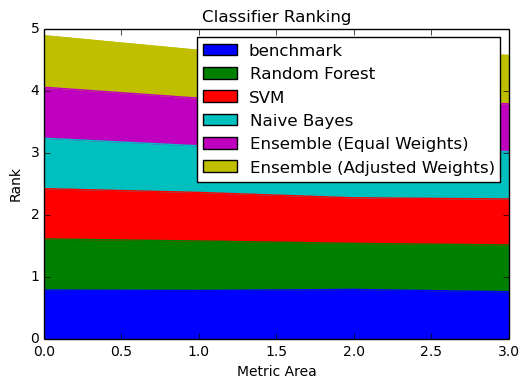

In [12]:
# Plot the final results as an area
plot = results.plot(kind = "area", title = "Classifier Ranking")
plot.set_xlabel("Metric Area")
plot.set_ylabel("Rank");

Plot 3 shows the __scaled__ cumulative performance metrics (*X* axis) and how these contribute to the overall ranking of the classifier in relation to the other models. As can seen (from the *Y* axis), the the models are ranked as follows from lowest to highest:

1. *Logistic Regression* (benchmark).
2. *Random Forest*.
3. *SVM*.
4. *Gaussian Naive Bayes*.
5. *Weighted Majority Rule* ensemble model with equal weights.
6. *Weighted Majority Rule* ensemble model with adjusted weights.


### Reflection
In conclusion the project highlights a concept of a pipeline that can be leveraged to determine if a subject is suffering a heart attack and hence take appropriate action. To accomplish this the project has detailed the performance of three individual classifiers as well as the performance when these models are combined. By applying weights based on the individual model's performance a weighted ensemble model has been selected for the final classifier. 

__So how well does the final classifier predict the classification on new, previously unseen iputs?__

After training each of the individual models, a set of new data comprising of __10__ unseen observations from the PPG waveform is used to determine how well the final model can correctly predicts whether the test subject's "state" is `stress` or `relax`. 

Table 5 shows the predicted value of the final model against the actual (`truth`) label of the data. 

> **Note:** The same data preprocessing tasks have been applied to the new, unseen data set.

In [13]:
# Import new unseen data
unseen = pd.read_csv("data/new.csv", header = None)

# Apply column names
names = ["Time", "AVHR", "AVRR", "SDRR", "RMSSD", "ppNN50", "ppNN20", "State"]
unseen.columns = names
unseen = unseen.drop("Time", 1)
truth = unseen["State"]
#truth.columns = "State"
unseen = unseen.drop("State", 1)

# Run predictions on new unseen data
preds = pd.DataFrame()
preds["Truth"] = list(truth)
for clf, label in zip([eclf2], [ "Ensemble (Adjusted Weights)"]):
    pred = list(cross_val_predict(clf, unseen, truth, cv = 2))
    preds[label] = pd.Series(pred, index = preds.index)
preds

Truth  Ensemble (Adjusted Weights)
0      1                            0
1      0                            0
2      0                            0
3      0                            0
4      1                            0
5      0                            0
6      1                            0
7      0                            0
8      1                            0
9      0                            0

It is the final objective of this project to re-apply the resulting models to the overall pipeline and then avail the pipeline to a set of new test subjects to hopefully provide a viable prototype that can preemptively warn of potential heart attacks. If one considers that peoples lives are in essence at stake and if there is a misclassification that the subject isn't stressed, but actually is, then this could result in a fatality.

Table 5 shows the original, `truth` prediction of the new, unseen data. The subsequent column show the prediction of the *Weighted Majority Rule* ensemble model, the chosen classifier in this project. As can be seen, it only classifies __60%__ of the observations correctly. This final classification accuracy must reflect this __urgency__ and hence be higher. So based on the final classification results shown in the project, it is evident that there is more work to be done so as to improve on the accuracy of all the classifiers. __60%__ is simply __not good enough!__

### Improvement

So Even though there is a gradual improvement from each individual model to the *Majority Rule* ensemble classifier then further by improving the weights, the overall __Accuracy__ score is not, in my opinion, high enough and Table 5 highlights this concern. To this end, further testing on other classification models, like a *Neural Network*, needs to be investigated.

>**Note:** I'm personally not familiar with the intricacies of *Neural Networks*, but it is my hope that the classifier will find patterns in the PPG waveform that can be leveraged to make a higher prediction score.

The *Neural Network* will be compiled into a sequence of layers. There is not a set methodology to determine exactly how many layers (or the width of each layer) will be needed, only through a process of trial and error can this be determined. It is hoped that the final networks captures the structure of the problem by introducing non-linearity, such that the final output becomes more linearly separable. A similar methodology as to how the final ensemble model was chosen in this project, will also be applied to the *Neural Network*, where different activation functions (__relu__, __sigmoid__, __tanh__ or __softmax__) will be weighted to see just how they capture the non-linearity. Backpropogation will help determine that. The final output layer will have two neurons to predict the class (`stress` or `relax`) probability.

One added benefit of using a *Neural Network* (if the accuracy score improves) is that it is easier to capture and save the model and apply it to the incoming PPG waveform data for the final production pipeline. It is my sincere hope that further testing and model evaluation will improve the overall predictive quality of the pipeline, to hopefully save lives.

<!--- Original code to enhance the model by finding the best weights
import pandas as pd

np.random.seed(42)

df = pd.DataFrame(columns=('w1', 'w2', 'w3', 'mean', 'std'))

i = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):

            if len(set((w1,w2,w3))) == 1: # skip if all weights are equal
                continue

            eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[w1,w2,w3])
            scores = cross_validation.cross_val_score(
                                            estimator=eclf,
                                            X=X,
                                            y=y,
                                            cv=20,
                                            scoring='accuracy',
                                            n_jobs=1)

            df.loc[i] = [w1, w2, w3, scores.mean(), scores.std()]
            i += 1

df.sort(columns=['mean', 'std'], ascending=False).head(3)
--->

<!--- Original code to apply the weights from above
np.random.seed(42)
eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[2.0,1.0,3.0])

for clf, label in zip([clf1, clf2, clf3, eclf], ["Random Forest", "SVM", "Naive Bayes", "Ensemble"]):

    scores = cross_validation.cross_val_score(clf, X, y, cv=20, scoring='accuracy')
    print "Accuracy: {} {} {}".format(scores.mean(), scores.std(), label)
--->

---

## VI. References

[^1]: (https://www.heart.org/idc/groups/ahamah-public/@wcm/@sop/@smd/documents/downloadable/ucm_480086.pdf)
[^2]: (http://www.heart.org/HEARTORG/HealthyLiving/PhysicalActivity/FitnessBasics/Target-Heart-Rates_UCM_434341_Article.jsp#.WHEiXbGZNE4)
[^3]: (https://www.nhlbi.nih.gov/health/health-topics/topics/rehab)
[^4]: (https://en.wikipedia.org/wiki/Photoplethysmogram)
[^5]: (http://scikit-learn.org/stable/modules/ensemble.html#weighted-average-probabilities-soft-voting)
[^6]: (https://www.dell.com/en-us/work/learn/internet-of-things-labs)
[^7]: (http://www.myithlete.com/what-is-hrv/)
[^8]: (https://www.fitbit.com/charge2)
[^9]: (https://en.wikipedia.org/wiki/Random_forest)
[^10]: (https://en.wikipedia.org/wiki/Support_vector_machine)
[^11]: (https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
[^12]: (http://paginas.fe.up.pt/~ec/files_1011/week%2008%20-%20Decision%20Trees.pdf)

<!---
# Convert 'stress' and 'relax' to binary
one_hot = pd.get_dummies(df['State'])
data = df.drop('State', 1)
data = data.join(one_hot)

# Create variables and labels
y = data[['stress', 'relax']]
X = data.drop(['stress', 'relax' ], 1)
--->